In [1]:
# Importing essential libraries
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning tools from Scikit-learn
from sklearn.preprocessing import LabelEncoder ,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Importing XGBoost library for regression
from xgboost import XGBRegressor


### read and understand data

In [2]:
# Create file path
file_path = os.path.join(os.getcwd(),'all_perth_310121.csv')
# Load CSV file
data=pd.read_csv(file_path)
# Preview data
data.head(2)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.11590,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.19347,115.859554,ATWELL COLLEGE,5.524324,129.0


In [3]:
# Convert 'DATE_SOLD' column to datetime format 
data['DATE_SOLD'] = pd.to_datetime(data['DATE_SOLD'], errors='coerce')

print(data['DATE_SOLD'])


0       2018-09-01
1       2019-02-01
2       2015-06-01
3       2018-07-01
4       2016-11-01
           ...    
33651   2016-03-01
33652   2017-02-01
33653   2017-02-01
33654   2016-10-01
33655   2016-05-01
Name: DATE_SOLD, Length: 33656, dtype: datetime64[ns]


C:\Users\MHMD RAGAB\AppData\Local\Temp\ipykernel_7932\335408266.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE_SOLD'] = pd.to_datetime(data['DATE_SOLD'], errors='coerce')


In [4]:
data.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,2018-09-01,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,2019-02-01,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,2015-06-01,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,2018-07-01,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,2016-11-01,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [5]:
# Check for missing values in each column
data.isna().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [6]:
# Get  information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ADDRESS           33656 non-null  object        
 1   SUBURB            33656 non-null  object        
 2   PRICE             33656 non-null  int64         
 3   BEDROOMS          33656 non-null  int64         
 4   BATHROOMS         33656 non-null  int64         
 5   GARAGE            31178 non-null  float64       
 6   LAND_AREA         33656 non-null  int64         
 7   FLOOR_AREA        33656 non-null  int64         
 8   BUILD_YEAR        30501 non-null  float64       
 9   CBD_DIST          33656 non-null  int64         
 10  NEAREST_STN       33656 non-null  object        
 11  NEAREST_STN_DIST  33656 non-null  int64         
 12  DATE_SOLD         33656 non-null  datetime64[ns]
 13  POSTCODE          33656 non-null  int64         
 14  LATITUDE          3365

In [7]:
# Get the data types of each column
column_types = data.dtypes
print(column_types)

# Count how many columns are of each data type
type_counts = column_types.value_counts()
print("\nNumber of each data type:")
print(type_counts)


ADDRESS                     object
SUBURB                      object
PRICE                        int64
BEDROOMS                     int64
BATHROOMS                    int64
GARAGE                     float64
LAND_AREA                    int64
FLOOR_AREA                   int64
BUILD_YEAR                 float64
CBD_DIST                     int64
NEAREST_STN                 object
NEAREST_STN_DIST             int64
DATE_SOLD           datetime64[ns]
POSTCODE                     int64
LATITUDE                   float64
LONGITUDE                  float64
NEAREST_SCH                 object
NEAREST_SCH_DIST           float64
NEAREST_SCH_RANK           float64
dtype: object

Number of each data type:
int64             8
float64           6
object            4
datetime64[ns]    1
Name: count, dtype: int64


In [8]:

# Get the data types of each column
column_types = data.dtypes

# Get the list of numeric columns (float64)
numeric_columns = column_types[column_types == 'float64'].index.tolist()

# Get the list of integer columns (int64)
integer_columns = column_types[column_types == 'int64'].index.tolist()

# Get the list of object columns (categorical or string)
object_columns = column_types[column_types == 'object'].index.tolist()

# Print the columns by type
print("Numeric columns (float64):", numeric_columns)
print("Integer columns (int64):", integer_columns)
print("Object columns (Categorical/String):", object_columns)



Numeric columns (float64): ['GARAGE', 'BUILD_YEAR', 'LATITUDE', 'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK']
Integer columns (int64): ['PRICE', 'BEDROOMS', 'BATHROOMS', 'LAND_AREA', 'FLOOR_AREA', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE']
Object columns (Categorical/String): ['ADDRESS', 'SUBURB', 'NEAREST_STN', 'NEAREST_SCH']


In [9]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
PRICE,33656.0,637072.005794,51000.0,410000.0,535500.0,760000.0,2440000.0,355825.632737
BEDROOMS,33656.0,3.65911,1.0,3.0,4.0,4.0,10.0,0.752038
BATHROOMS,33656.0,1.823063,1.0,1.0,2.0,2.0,16.0,0.587427
GARAGE,31178.0,2.199917,1.0,2.0,2.0,2.0,99.0,1.365225
LAND_AREA,33656.0,2740.644016,61.0,503.0,682.0,838.0,999999.0,16693.513215
FLOOR_AREA,33656.0,183.501545,1.0,130.0,172.0,222.25,870.0,72.102982
BUILD_YEAR,30501.0,1989.706436,1868.0,1978.0,1995.0,2005.0,2017.0,20.96433
CBD_DIST,33656.0,19777.374465,681.0,11200.0,17500.0,26600.0,59800.0,11364.415413
NEAREST_STN_DIST,33656.0,4523.371494,46.0,1800.0,3200.0,5300.0,35500.0,4495.064024
DATE_SOLD,33656,2017-02-05 22:44:21.278821120,1988-04-01 00:00:00,2015-11-01 00:00:00,2017-11-01 00:00:00,2019-06-01 00:00:00,2020-12-01 00:00:00,NaN


In [10]:
data.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(33656, 19)

### label incoder in features

In [13]:
'ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH'

('ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH')

In [14]:

lbl = LabelEncoder()

data['ADDRESS'] = lbl.fit_transform(data['ADDRESS'])
data['SUBURB'] = lbl.fit_transform(data['SUBURB'])
data['NEAREST_STN'] = lbl.fit_transform(data['NEAREST_STN'])
data['DATE_SOLD'] = lbl.fit_transform(data['DATE_SOLD'])
data['NEAREST_SCH'] = lbl.fit_transform(data['NEAREST_SCH'])

In [15]:
# Count the number of unique values in each column
unique_values_per_column = data.nunique()

# Print the number of unique values for each column
print("Number of unique values in each column:")
print(unique_values_per_column)


Number of unique values in each column:
ADDRESS             33566
SUBURB                321
PRICE                2297
BEDROOMS               10
BATHROOMS               8
GARAGE                 25
LAND_AREA            4372
FLOOR_AREA            528
BUILD_YEAR            124
CBD_DIST              595
NEAREST_STN            68
NEAREST_STN_DIST     1189
DATE_SOLD             350
POSTCODE              114
LATITUDE            29707
LONGITUDE           28557
NEAREST_SCH           160
NEAREST_SCH_DIST    33318
NEAREST_SCH_RANK      103
dtype: int64


In [16]:
data.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,266,565000,4,2,2.0,600,160,2003.0,18300,17,1800,322,6164,-32.115900,115.842450,81,0.828339,NaN
1,1,290,365000,3,2,2.0,351,139,2013.0,26900,35,4900,327,6167,-32.193470,115.859554,8,5.524324,129.0
2,2,53,287000,3,1,1.0,719,86,1979.0,22600,12,1900,283,6111,-32.120578,115.993579,73,1.649178,113.0
3,3,32,255000,2,1,2.0,651,59,1953.0,17900,43,3600,320,6056,-31.900547,116.038009,144,1.571401,NaN
4,4,175,325000,4,1,2.0,466,131,1998.0,11200,2,2000,300,6054,-31.885790,115.947780,76,1.514922,NaN


### visualisation data 

C:\Users\MHMD RAGAB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


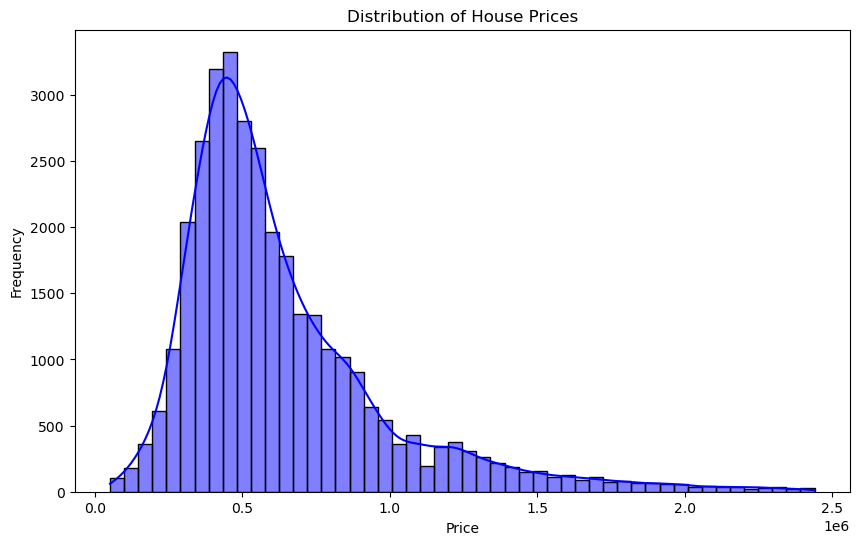

In [18]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['PRICE'], bins=50, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



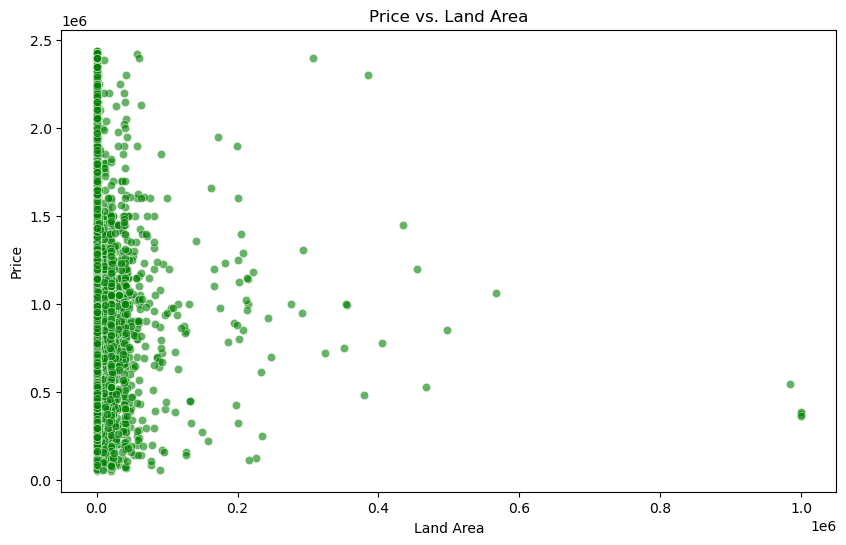

In [19]:
# The relationship between price and land area
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['LAND_AREA'], y=data['PRICE'], alpha=0.6, color='green')
plt.title('Price vs. Land Area')
plt.xlabel('Land Area')
plt.ylabel('Price')
plt.show()

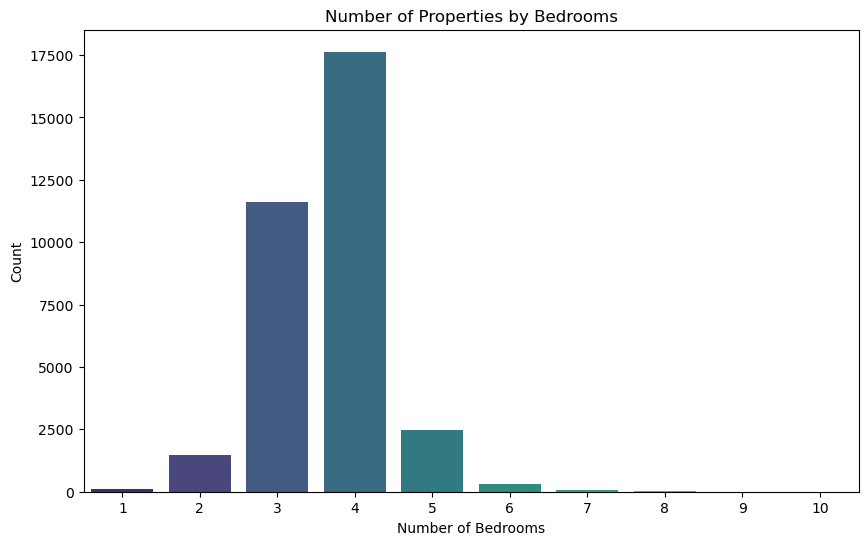

In [20]:

# Distribution of the number of rooms
plt.figure(figsize=(10, 6))
sns.countplot(x=data['BEDROOMS'], palette='viridis')
plt.title('Number of Properties by Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

### feature engenering

### Handling hulls

In [21]:
data.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,266,565000,4,2,2.0,600,160,2003.0,18300,17,1800,322,6164,-32.115900,115.842450,81,0.828339,NaN
1,1,290,365000,3,2,2.0,351,139,2013.0,26900,35,4900,327,6167,-32.193470,115.859554,8,5.524324,129.0
2,2,53,287000,3,1,1.0,719,86,1979.0,22600,12,1900,283,6111,-32.120578,115.993579,73,1.649178,113.0
3,3,32,255000,2,1,2.0,651,59,1953.0,17900,43,3600,320,6056,-31.900547,116.038009,144,1.571401,NaN
4,4,175,325000,4,1,2.0,466,131,1998.0,11200,2,2000,300,6054,-31.885790,115.947780,76,1.514922,NaN


In [22]:
data.isna().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [24]:
# Fill missing values in 'GARAGE' column with the median
data['GARAGE'].fillna(data['GARAGE'].median(), inplace=True)

# Fill missing values in 'BUILD_YEAR' column with the median
data['BUILD_YEAR'].fillna(data['BUILD_YEAR'].median(), inplace=True)

# Fill missing values in 'NEAREST_SCH_RANK' column with the median
data['NEAREST_SCH_RANK'].fillna(data['NEAREST_SCH_RANK'].median(), inplace=True)


In [25]:
data.isna().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

### feature extraction and selection

In [26]:
# Correlation of all columns with 'PRICE', sorted in descending order
data.corr()['PRICE'].sort_values(ascending=False).T


PRICE               1.000000
FLOOR_AREA          0.548497
BATHROOMS           0.377133
BEDROOMS            0.252637
GARAGE              0.130578
DATE_SOLD           0.072602
LAND_AREA           0.056855
LATITUDE            0.053041
SUBURB              0.043057
ADDRESS             0.004906
NEAREST_STN         0.004296
NEAREST_SCH        -0.014546
NEAREST_SCH_DIST   -0.021941
NEAREST_STN_DIST   -0.095089
BUILD_YEAR         -0.150847
POSTCODE           -0.171553
LONGITUDE          -0.183734
CBD_DIST           -0.354327
NEAREST_SCH_RANK   -0.397960
Name: PRICE, dtype: float64

In [27]:
data.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [28]:
# Sum of 'BATHROOMS' and 'BEDROOMS'
data['bathroom_bedroom_sum'] = data['BATHROOMS'] + data['BEDROOMS']

# 'FLOOR_AREA' multiplied by 'bathroom_bedroom_sum'
data['floor_area_bathroom_bedroom'] = data['FLOOR_AREA'] * data['bathroom_bedroom_sum']

# Calculate the age of the house
data['house_age'] = 2024 - data['BUILD_YEAR']  

# 'house_age' multiplied by 'PRICE'
data['age_price'] = data['house_age'] * data['PRICE'] 

# Price divided by 'CBD_DIST'
data['price_cbd_distance'] = data['PRICE'] / data['CBD_DIST']

# Subtract 'house_age' from 'price_cbd_distance'
data['price_cbd_distance_age'] = data['price_cbd_distance'] - data['house_age']


In [29]:
data.shape

(33656, 25)

In [30]:
data.corr()['PRICE'].sort_values(ascending=False)

PRICE                          1.000000
price_cbd_distance             0.698537
price_cbd_distance_age         0.688656
age_price                      0.672838
FLOOR_AREA                     0.548497
floor_area_bathroom_bedroom    0.528491
BATHROOMS                      0.377133
bathroom_bedroom_sum           0.347607
BEDROOMS                       0.252637
house_age                      0.150847
GARAGE                         0.130578
DATE_SOLD                      0.072602
LAND_AREA                      0.056855
LATITUDE                       0.053041
SUBURB                         0.043057
ADDRESS                        0.004906
NEAREST_STN                    0.004296
NEAREST_SCH                   -0.014546
NEAREST_SCH_DIST              -0.021941
NEAREST_STN_DIST              -0.095089
BUILD_YEAR                    -0.150847
POSTCODE                      -0.171553
LONGITUDE                     -0.183734
CBD_DIST                      -0.354327
NEAREST_SCH_RANK              -0.397960


###  model training

In [37]:
# Drop 'PRICE' column from the data to create the feature set (X)
X = data.drop('PRICE', axis=1)

# Create the target variable (y) by selecting the 'PRICE' column
y = data['PRICE']


In [38]:

data.shape

(33656, 25)

In [39]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
len_reg = LinearRegression()

# Train the model on the training data
len_reg.fit(X_train, y_train)


LinearRegression()

In [40]:
# Make predictions on the test data using the trained model
y_pred = len_reg.predict(X_test)


In [41]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 24310892206.80297
R² Score: 0.8146235364206112


In [42]:
# Initialize and train a RandomForestRegressor with 100 trees
rand_fors_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rand_fors_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [43]:
# Make predictions on the test data using the trained RandomForestRegressor
y_pred_forest = rand_fors_reg.predict(X_test)


### MODEL EVALUATION

In [44]:
# Calculate Mean Squared Error (MSE) and R² Score to evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred_forest)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 24310892206.80297
R² Score: 0.9908917478364523


In [45]:
# Initialize and train a KNeighborsRegressor with 5 neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsRegressor()

In [46]:
# Predict using the trained KNeighborsRegressor
y_pred_knn = knn_model.predict(X_test)


In [47]:
# Calculate MSE and R² Score for the KNN model to evaluate performance
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

# Print evaluation metrics for KNN model
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 71583659272.29355
R² Score: 0.4541571945164422


In [48]:
# Initialize and train an XGBRegressor with specified parameters
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.01, max_depth=10)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
# Make predictions on the test data using the trained XGBRegressor
y_pred_xgboost = xgb_model.predict(X_test)


In [50]:
# Calculate MSE and R² Score for the XGBoost model to evaluate performance
mse = mean_squared_error(y_test, y_pred_xgboost)
r2 = r2_score(y_test, y_pred_xgboost)

# Print evaluation metrics for XGBoost model
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 1639962725.4795253
R² Score: 0.9874948855078902
